In [1]:
## Qt-1, Qt-2, Pt-1, T(max,t-1),  
#Reading /Users/mezzatab/Dropbox/Hydrology/Data/Data/hydrology.nws.noaa.gov/pub/gcip/mopex/US_Data/Us_438_Daily ## 
# It has Q,P, evaporation, tmax, tmin #
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import sklearn
print sklearn.__version__
from sklearn.model_selection import ShuffleSplit, train_test_split
from CastFloatCastInt import castFloat, castInt 

Path="/Users/mezzatab/Dropbox/Hydrology/Data/Data/hydrology.nws.noaa.gov/pub/gcip/mopex/US_Data/Us_438_Daily/"
PathQ="/Users/mezzatab/Dropbox/Hydrology/Data/Data/hydrology.nws.noaa.gov/pub/gcip/mopex/US_Data/Daily Q 1800/"
ImagePath="/Users/mezzatab/Dropbox/Hydrology-ML/Images/"

0.19.1


In [2]:
## Check specfic area : 03451500.dly # 
## Reading Data ## 
pathFile=Path+"03451500.dly"
pathQFile=PathQ+"03451500.dq"
startYear=1948 ## 

f=open(pathFile) 
data=f.readlines()

fQ=open(pathQFile) 
dataQ=fQ.readlines()

In [3]:
#dataFrame=pd.DataFrame()#columns=["Time","precipitation","evaporation","discharge","Tmax","Tmin"])
rows=0
x=0
Time=[]
Prec=[]
Eva=[]
Discharge=[]
Tmax=[]
Tav=[]
Tmin=[]
for line in data:
    List=line.split()
    Row=[]
    L=len(List)
    if L == 8: 
        time=List[0]+'0'+List[1]+'0'+List[2]
        x=3
    if L == 7:
        time=List[0]+'0'+List[1]#+List[2]
#        print time
        x=2
    if L == 6:
        time=List[0]
        x=1
    year=castInt(time)/10000
    if year >= startYear:
        Time.append(castInt(time))
        Prec.append(castFloat(List[x]))
        Eva.append(castFloat(List[x+1]))
        Discharge.append(castFloat(List[x+2]))
        Tmax.append(castFloat(List[x+3]))
        Tmin.append(castFloat(List[x+4]))
        Tav.append((castFloat(List[x+3])+castFloat(List[x+4]))/2.0)
    rows=rows+1
#dataFrame=pd.DataFrame({'Time':Time,'P':Prec, 'Eva':Eva, 'Discharge':Discharge,'T':Tav, 'Tmax':Tmax,'Tmin':Tmin })
#dataFrame=pd.DataFrame({'Time':Time,'P':Prec, 'Eva':Eva, 'Q':Discharge,'Tmax':Tmax,'Tmin':Tmin })

## Reading Q data from Different file ## 
File="/Users/mezzatab/Dropbox/Hydrology/Data/Data/hydrology.nws.noaa.gov/pub/gcip/mopex/US_Data/Daily Q 1800/"

In [4]:
## Reading Q data from Different file ## 
qTime=[]
Q=[]
for line in dataQ[1:]:
#    month=[]
    Month=line.split()
    year=castInt(Month[0])/100
    month=castInt(Month[0])-100*year
    if year >= startYear:     
        for i,t in enumerate(Month[1:]):
            try:
                if castFloat(t) > 0:
                    Q.append(castFloat(t))
                    if i < 9:
                        time=Month[0]+'0'+str(i+1)
                    else:
                        time=Month[0]+str(i+1)
                    qTime.append(time)
            except ValueError:
                pass

In [5]:
# The last data for Q is 2002-09-30, which is 19997 elements or Q[19996]
dataFrame=pd.DataFrame({'Time':Time[:19997],'Q':Q[:19997], 'P':Prec[:19997], 'PET':Eva[:19997],'Discharge':Discharge[:19997],'T':Tav[:19997],'Tmax':Tmax[:19997],'Tmin':Tmin[:19997] })
#print len(Q)
#print len(Time[:19997])

## tranforming dataframe from daily to monthly average ## 

In [6]:
line=dataFrame.loc[0,"Time"]
monthOld=int(line/100)-100*(int(line/10000))
mFrac=(monthOld-1)/12.0
year=int(line/10000)+mFrac
time=int(line/100)
qav=0
Tmin_av=0
Tmax_av=0
Ev_av=0
Pav=0
T_av=0
count=0

Time=[]
Prec=[]
Eva=[]
Discharge=[]
Tmax=[]
Tav=[]
Tmin=[]
for i in range(len(dataFrame.loc[:,"Time"])):
    line=dataFrame.loc[i,"Time"]
    month=int(line/100)-100*(int(line/10000))

    if month==monthOld:
        count=count+1
        qav+=dataFrame.loc[i,"Q"]
        Pav+=dataFrame.loc[i,"P"]
        T_av+=dataFrame.loc[i,"T"]
        Tmin_av+=dataFrame.loc[i,"Tmin"]
        Tmax_av+=dataFrame.loc[i,"Tmax"]
        Ev_av+=dataFrame.loc[i,"PET"]
    else:
        qav/=count
#        Pav/=count
        T_av/=count
        Tmin_av/=count
        Tmax_av/=count
        Ev_av/=count

        Time.append(year)
        time=int(line/100)    
        Prec.append(Pav)     
        Tav.append(T_av)
        Eva.append(Ev_av)
        Tmax.append(Tmax_av)
        Tmin.append(Tmin_av)
        Discharge.append(qav)
        mFrac=(month-1)/12.0
        year=int(line/10000)+mFrac

        
        count=0
        monthOld=month
        qav=0
        Pav=0
        T_av=0
        Tmin_av=0
        Tmax_av=0
        Ev_av=0
MonthFrame=pd.DataFrame({'Time':Time,'P':Prec, 'PET':Eva, 'Q':Discharge,'T':Tav, 'Tmax':Tmax,'Tmin':Tmin })

In [7]:
Time[0]

1948.0

## Reading the new set of Data ## 2004-2017

In [8]:
## Reading New Years Data ## 
Path_NewData="/Users/mezzatab/Dropbox/Hydrology/Data/Data/Codes/New_Data/"
P_NY="Precipitation_2014-2018" 
Q_NY="Discharge_2004-2018"
T_NY="All_T.csv"

In [9]:
PathP=Path_NewData+P_NY
PathQ=Path_NewData+Q_NY
PathT=Path_NewData+T_NY
fN_P=open(PathP) 
dataN_P=fN_P.readlines()

fN_Q=open(PathQ) 
dataN_Q=fN_Q.readlines()

fN_T=open(PathT) 
dataN_T=fN_T.readlines()

In [10]:
# Q, starting line is 33
# P, starting line is 32 
#print dataN_Q[33:38]
#print dataN_P[32:38]
TimeT_N=[]
Tmax_N=[]
Tav_N=[]
Tmin_N=[]
for i,line in enumerate(dataN_T[28:]):
    List=line.split(",")
    length=len(List)
    tav=(castFloat(List[length-3])-32)*(5.0/9.0)
    tmax=(castFloat(List[length-2])-32)*(5.0/9.0)
    tmin=(castFloat(List[length-1])-32)*(5.0/9.0)
    Tav_N.append(tav)
    Tmax_N.append(tmax)
    Tmin_N.append(tmin)
#    TimeT_N.append(List[6])
#    print List[5] 
    date=List[6].split('-')
    TimeT_N.append(castInt(date[0])+(castInt(date[1])-1)/12.0)

In [11]:
print  len(TimeT_N)

168


In [12]:
#dataFrame=pd.DataFrame()#columns=["Time","precipitation","evaporation","discharge","Tmax","Tmin"])
## Reading new Discharge from 2004 -> Upfront 
unitChange=0.0283168466 
rows=0
x=0
TimeQ=[]
YearQ=[]
MonthQ=[]
DayQ=[]
#Prec=[]
##Eva=[]
DischargeQ=[]
##Tmax=[]
##Tav=[]
##Tmin=[]
for i,line in enumerate(dataN_Q[33:]):
    List=line.split()
    length=len(List)
    DischargeQ.append(unitChange*castFloat(List[length-2]))
    date=List[2].split('-')
    YearQ.append(castInt(date[0]))
    MonthQ.append(castInt(date[1]))
    DayQ.append(castInt(date[2]))
    time=10000*castInt(date[0])+100*castInt(date[1])+castInt(date[2])
    TimeQ.append(time)
#dataFrameN_Q=pd.DataFrame({'Year':Year,'Month':Month, 'Day':Day, 'Discharge':Discharge,'T':Tav, 'Tmax':Tmax,'Tmin':Tmin })#columns=["Time","precipitation","evaporation","discharge","Tmax","Tmin"])

In [13]:
## Reading new Precipation from 2004-> # CLeaning the missing data with their yearly average #
unitChange=25.4
YearP=[]
MonthP=[]
DayP=[]
PrecP=[]
TimeP=[]
for i,line in enumerate(dataN_P[32:]):
    List=line.split()
    length=len(List)
    date=List[2].split('-')
    YearP.append(castInt(date[0]))
    MonthP.append(castInt(date[1]))
    DayP.append(castInt(date[2]))
    time=10000*castInt(date[0])+100*castInt(date[1])+castInt(date[2])
    TimeP.append(time)    
    if length!=3:
        PrecP.append(unitChange*castFloat(List[length-2]))
    else:
        PrecP.append(-0.1)

In [14]:
yearLength=[366,365,365,365,366,365,365,365,366,365,365,365,366,365]
yearAc=[]
Sum=0
for i in range(len(yearLength)):
    Sum=Sum+yearLength[i]
    yearAc.append(Sum)
missing=[]
avPrec=[]
startYear=2004
for i in range(366):
    year=0
    count=0
    avprec=0
    j=i
    if PrecP[i] < 0:
        avprec=0
    else:
        avprec=avprec+PrecP[i]
    while year < len(yearLength)-1:
        j=j+yearLength[year]
        year=year+1
        if PrecP[j] > -0.1:
            avprec=avprec+PrecP[j]
            count=count+1
    avprec=avprec/(count+1)
    avPrec.append(avprec)
#plt.clf()
#plt.plot(avPrec)
#plt.show()
## Update the Prec to replace absent data with average ## 
for i,prec in enumerate(PrecP):
    if PrecP[i]==-0.1:
        year=YearP[i]-2004
#        print year
        if year==0:
            PrecP[i]=avPrec[i]
        else:
#            print i-yearAc[year-1]
            PrecP[i]=avPrec[i-yearAc[year-1]]

In [15]:
line=TimeQ[0]
monthOld=int(line/100)-100*(int(line/10000))
mFrac=(monthOld-1)/12.0
year=int(line/10000)+mFrac
time=int(line/100)
qav=0
Pav=0
count=0

M_Time=[]
M_Prec=[]
M_Dis=[]
M_Eva=[]

for i in range(len(TimeQ)): ## To make things in the same size ## 
    line=TimeQ[i]
    month=int(line/100)-100*(int(line/10000))
#    if int(line/100) >= 201800:
#        break 
    if month==monthOld:
        count=count+1
        qav+=DischargeQ[i]
        Pav+=PrecP[i]
#        T_av+=dataFrame.loc[i,"T"]
#        Tmin_av+=dataFrame.loc[i,"Tmin"]
#        Tmax_av+=dataFrame.loc[i,"Tmax"]
#        Ev_av+=dataFrame.loc[i,"PET"]
    else:
        qav/=count
#        Pav/=count
        M_Time.append(year)
        time=int(line/100)    
        M_Prec.append(Pav)     
        M_Eva.append(0)
        M_Dis.append(qav)
        mFrac=(month-1)/12.0
        year=int(line/10000)+mFrac

        
        count=0
        monthOld=month
        qav=0
        Pav=0
#New_MonthFrame=pd.DataFrame({'Time':Time,'P':Prec, 'PET':Eva, 'Q':Discharge,'T':Tav, 'Tmax':Tmax,'Tmin':Tmin })

In [16]:
Min= min(len(TimeT_N),len(M_Time))
#print Min
bNewData=len(Time) # Beginning of new data # 
lNewData=Min
testStart=480 # Beginning of 1988 # 
print bNewData
print lNewData
print testStart
print Min+bNewData
MonthFrame_WithNew=pd.DataFrame({'Time':Time[:bNewData-8]+TimeT_N[:Min],'P':Prec[:bNewData-8]+M_Prec[:Min], 'PET':Eva[:bNewData-8]+M_Eva[:Min], 'Q':Discharge[:bNewData-8]+M_Dis[:Min],'T':Tav[:bNewData-8]+Tav_N[:Min], 'Tmax':Tmax[:bNewData-8]+Tmax_N[:Min],'Tmin':Tmin[:bNewData-8]+Tmin_N[:Min] })

656
168
480
824


In [17]:
avP=[]
avT=[]
avQ=[]
avPET=[]
avTmin=[]
avTmax=[]
sumPET=[0]*12
sumP=[0]*12
sumT=[0]*12
sumQ=[0]*12
sumTmax=[0]*12
sumTmin=[0]*12

count=0
year=1
for i in range(len(MonthFrame_WithNew)):
#    count=count+1
    sumPET[count]=sumPET[count]+MonthFrame_WithNew.loc[i,"PET"]    
    sumP[count]=sumP[count]+MonthFrame_WithNew.loc[i,"P"]
    sumT[count]=sumT[count]+MonthFrame_WithNew.loc[i,"T"]
    sumQ[count]=sumQ[count]+MonthFrame_WithNew.loc[i,"Q"]
    sumTmin[count]=sumTmin[count]+MonthFrame_WithNew.loc[i,"Tmin"]    
    sumTmax[count]=sumTmax[count]+MonthFrame_WithNew.loc[i,"Tmax"]
    avP.append(sumP[count]/year)
    avT.append(sumT[count]/year)
    avQ.append(sumQ[count]/year)
    avPET.append(sumPET[count]/year)
    avTmin.append(sumTmin[count]/year)
    avTmax.append(sumTmax[count]/year)
    count=count+1
    if count==12:
        year=year+1
        count=0
MonthFrame_WithNew.loc[:,"avTmax"]=avTmax
MonthFrame_WithNew.loc[:,"avTmin"]=avTmin
MonthFrame_WithNew.loc[:,"avT"]=avT
MonthFrame_WithNew.loc[:,"avP"]=avP
MonthFrame_WithNew.loc[:,"avQ"]=avQ
MonthFrame_WithNew.loc[:,"avPET"]=avPET

In [35]:
## Holdridge life zones: https://en.wikipedia.org/wiki/Holdridge_life_zones ##
# Calculate Biotemperature: Sum (0<T<30)/12
BioT=[]
YEAR=[]
PANN=[]
PATR=[]
yearOld=int(MonthFrame_WithNew.loc[0,"Time"])
YEAR.append(yearOld)
#print year
bioT=0
pann=0
for i in range(len(MonthFrame_WithNew["Time"])):
    time=MonthFrame_WithNew.loc[i,"Time"]
    year=int(time)
    if year == yearOld:
        pann=pann+MonthFrame_WithNew.loc[i,"avP"]
        if MonthFrame_WithNew.loc[i,"avT"] < 30 and 0 < MonthFrame_WithNew.loc[i,"avT"]:
            bioT=bioT+MonthFrame_WithNew.loc[i,"avT"]
    else:
        YEAR.append(year)        
        bioT=bioT/12.0
        print bioT
        BioT.append(bioT)
        patr=bioT*58.93/pann
        PATR.append(patr)
        PANN.append(pann)
        if MonthFrame_WithNew.loc[i,"avT"] < 30 and 0 < MonthFrame_WithNew.loc[i,"avT"]:
            bioT=MonthFrame_WithNew.loc[i,"avT"]
        else:
            bioT=0
        pann=MonthFrame_WithNew.loc[i,"avP"]
        yearOld=year

bioT=bioT/12.0        
BioT.append(bioT)
patr=bioT*58.93/pann
PATR.append(patr)
PANN.append(pann)
YearFrame_WithNew=pd.DataFrame({'Time':YEAR,'BioT':BioT, 'PATR':PATR, 'PANN':PANN})

13.537090990264756
13.743412265566604
13.632018910689927
13.553471641377387
13.532436033750514
13.537106591379297
13.524493653311426
13.50051510497285
13.485935410883547
13.484130831587441
13.406091694637526
13.404911510713392
13.350191725543361
13.308263299365008
13.287436149685476
13.248643071730463
13.229335936514369
13.232884719657973
13.193688465815876
13.16655561141078
13.1384753321624
13.110840607927727
13.12464258054286
13.13361812828578
13.128429343014774
13.139061894910972
13.14779479348647
13.159227992569676
13.139215356289172
13.148120414832905
13.14100531984475
13.128405246707706
13.128754801977395
13.117775166230082
13.124079432538245
13.109226670700673
13.108779155447195
13.116152437079963
13.132055652294829
13.130369891495123
13.115565589044929
13.108574042427662
13.124838535946308
13.133826289853305
13.119941674146782
13.114328597524716
13.110789390613803
13.10517785395767
13.094088611202396
13.077115070991967
13.088922820864589
13.094048052776197
13.089861043438567
13

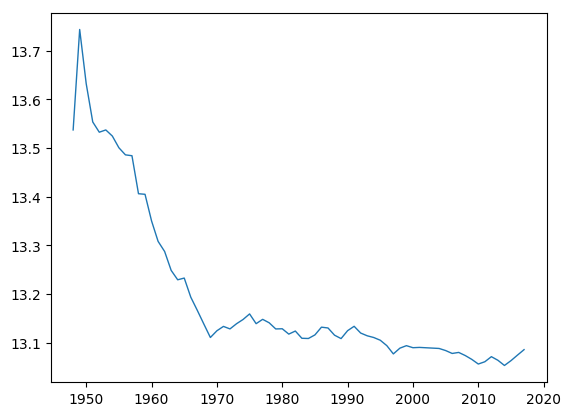

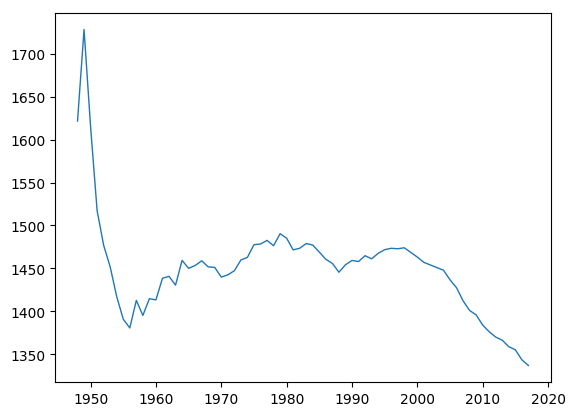

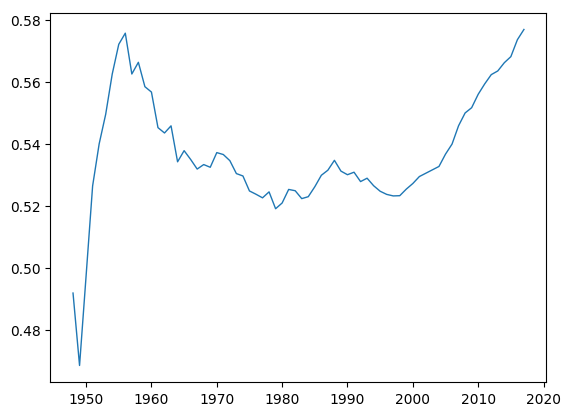

PATR    0.537109
dtype: float64
BioT    13.197535
dtype: float64
PANN    1450.011174
dtype: float64


In [92]:
## Warm Temperature Moist Forest 
plt.clf()
plt.plot(YearFrame_WithNew[["Time"]],YearFrame_WithNew[["BioT"]])#,".") # 13.3 , 1450 ml, 0.52
#plt.ylim(0,10)
plt.show()
plt.clf()
plt.plot(YearFrame_WithNew[["Time"]],YearFrame_WithNew[["PANN"]])#,".")
#plt.ylim(0,10)
plt.show()
plt.clf()
plt.plot(YearFrame_WithNew[["Time"]],YearFrame_WithNew[["PATR"]])#,".")
#plt.ylim(0,10)
plt.show()

print (YearFrame_WithNew[["PATR"]].mean())
print (YearFrame_WithNew[["BioT"]].mean())
print (YearFrame_WithNew[["PANN"]].mean())

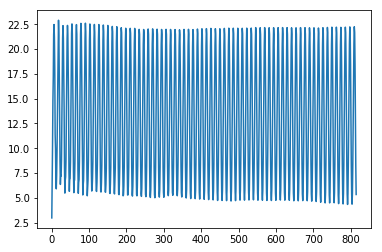

In [18]:
plt.clf()
plt.plot(MonthFrame_WithNew[["avT"]])#,".")
#plt.xlim(712,820)
plt.show()

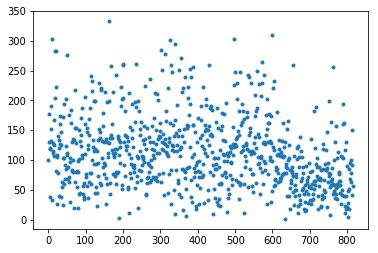

In [19]:
plt.clf()
plt.plot(MonthFrame_WithNew['P'],'.')
plt.show()

            $Q$       $P$     $PET$       $T$
$Q$    1.000000  0.634781 -0.146090 -0.300807
$P$    0.634781  1.000000  0.073293  0.044713
$PET$ -0.146090  0.073293  1.000000  0.906101
$T$   -0.300807  0.044713  0.906101  1.000000


<Figure size 576x396 with 0 Axes>

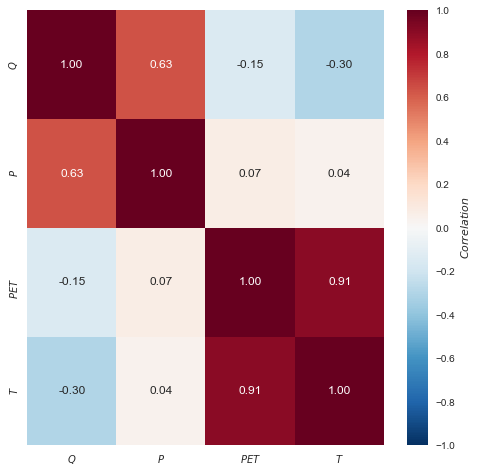

In [38]:
frame=MonthFrame.copy()
frame[["$Q$"]]=MonthFrame[["Q"]]
frame[["$P$"]]=MonthFrame[["P"]]
frame[["$T$"]]=MonthFrame[["T"]]
frame[["$PET$"]]=MonthFrame[["PET"]]
Corr=frame[["$Q$","$P$","$PET$","$T$"]].corr()
print Corr
import seaborn as sns
plt.clf()
fig, ax = plt.subplots(figsize=(8,8))
#plt.title("Correlation betweet features on the montly scale")
sns.heatmap(Corr,annot=True, vmin=-1.0, vmax=1.0,cbar_kws={'label':'$Correlation$',"ticks":[-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0]},fmt='0.2f')
plt.savefig("Images/MonthlyCorrelation.eps")
plt.savefig("Images/MonthlyCorrelation.png")
plt.show()

In [39]:
meanQ=MonthFrame_WithNew["Q"].mean()
minQ=MonthFrame_WithNew["Q"].min()
maxQ=MonthFrame_WithNew["Q"].max()
stdQ=MonthFrame_WithNew["Q"].std()
print MonthFrame_WithNew["Q"].describe()
print "\n"

meanP=MonthFrame_WithNew["P"].mean()
minP=MonthFrame_WithNew["P"].min()
maxP=MonthFrame_WithNew["P"].max()
stdP=MonthFrame_WithNew["P"].std()
print MonthFrame_WithNew["P"].describe()
print "\n"

meanPet=MonthFrame_WithNew["PET"].mean()
minPet=MonthFrame_WithNew["PET"].min()
maxPet=MonthFrame_WithNew["PET"].max()
stdPet=MonthFrame_WithNew["PET"].std()
print MonthFrame_WithNew["PET"].describe()
print "\n"


print MonthFrame_WithNew["T"].describe()
print "\n"
meanT=MonthFrame_WithNew["T"].mean()
minT=MonthFrame_WithNew["T"].min()
maxT=MonthFrame_WithNew["T"].max()
stdT=MonthFrame_WithNew["T"].std()

print MonthFrame_WithNew["Tmax"].describe()
print "\n"
meanTmax=MonthFrame_WithNew["Tmax"].mean()
minTmax=MonthFrame_WithNew["Tmax"].min()
maxTmax=MonthFrame_WithNew["Tmax"].max()
stdTmax=MonthFrame_WithNew["Tmax"].std()

print MonthFrame_WithNew["Tmin"].describe()
print "\n"
meanTmin=MonthFrame_WithNew["Tmin"].mean()
minTmin=MonthFrame_WithNew["Tmin"].min()
maxTmin=MonthFrame_WithNew["Tmin"].max()
stdTmin=MonthFrame_WithNew["Tmin"].std()

meanAvQ_m=MonthFrame_WithNew["avQ"].mean()
minAvQ_m=MonthFrame_WithNew["avQ"].min()
maxAvQ_m=MonthFrame_WithNew["avQ"].max()
stdAvQ_m=MonthFrame_WithNew["avQ"].std()
print MonthFrame_WithNew["avQ"].describe()
print "\n"


meanAvT_m=MonthFrame_WithNew["avT"].mean()
minAvT_m=MonthFrame_WithNew["avT"].min()
maxAvT_m=MonthFrame_WithNew["avT"].max()
stdAvT_m=MonthFrame_WithNew["avT"].std()
print MonthFrame_WithNew["avT"].describe()
print "\n"

meanAvTmin_m=MonthFrame_WithNew["avTmin"].mean()
minAvTmin_m=MonthFrame_WithNew["avTmin"].min()
maxAvTmin_m=MonthFrame_WithNew["avTmin"].max()
stdAvTmin_m=MonthFrame_WithNew["avTmin"].std()
print MonthFrame_WithNew["avTmin"].describe()
print "\n"

meanAvTmax_m=MonthFrame_WithNew["avTmax"].mean()
minAvTmax_m=MonthFrame_WithNew["avTmax"].min()
maxAvTmax_m=MonthFrame_WithNew["avTmax"].max()
stdAvTmax_m=MonthFrame_WithNew["avTmax"].std()
print MonthFrame_WithNew["avTmax"].describe()
print "\n"

meanAvP_m=MonthFrame_WithNew["avP"].mean()
minAvP_m=MonthFrame_WithNew["avP"].min()
maxAvP_m=MonthFrame_WithNew["avP"].max()
stdAvP_m=MonthFrame_WithNew["avP"].std()
print MonthFrame_WithNew["avP"].describe()
print "\n"

count    816.000000
mean      58.290164
std       33.159044
min        9.602414
25%       34.867083
50%       51.167418
75%       74.777369
max      297.248774
Name: Q, dtype: float64


count    816.000000
mean     111.409166
std       60.264372
min        1.210000
25%       66.695000
50%      105.155000
75%      141.762500
max      332.830000
Name: P, dtype: float64


count    816.000000
mean       1.778382
std        1.333525
min        0.000000
25%        0.710400
50%        1.714833
75%        3.224700
max        3.774276
Name: PET, dtype: float64


count    816.000000
mean      13.085859
std        6.583101
min       -1.111111
25%        6.927733
50%       12.713150
75%       19.587866
max       24.290555
Name: T, dtype: float64


count    816.000000
mean      19.008816
std        7.168064
min        2.761667
25%       12.337958
50%       19.602037
75%       25.545698
max       31.353333
Name: Tmax, dtype: float64


count    816.000000
mean       7.163107
std        6.172412
min  

In [40]:
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
#scaledFrame=pd.DataFrame()
scaledFrame=MonthFrame_WithNew.copy()
scaledFrame[["Q"]]=minmax_scale(MonthFrame_WithNew[["Q"]],feature_range=(0,1))
scaledFrame[["P"]]=minmax_scale(MonthFrame_WithNew[["P"]],feature_range=(0,1))
scaledFrame[["PET"]]=minmax_scale(MonthFrame_WithNew[["PET"]],feature_range=(0,1))
scaledFrame[["Tmin"]]=minmax_scale(MonthFrame_WithNew[["Tmin"]],feature_range=(0,1))
scaledFrame[["Tmax"]]=minmax_scale(MonthFrame_WithNew[["Tmax"]],feature_range=(0,1))
scaledFrame[["avTmin"]]=minmax_scale(MonthFrame_WithNew[["avTmin"]],feature_range=(0,1))
scaledFrame[["avTmax"]]=minmax_scale(MonthFrame_WithNew[["avTmax"]],feature_range=(0,1))
scaledFrame[["avP"]]=minmax_scale(MonthFrame_WithNew[["avP"]],feature_range=(0,1))
scaledFrame[["avT"]]=minmax_scale(MonthFrame_WithNew[["avT"]],feature_range=(0,1))
scaledFrame[["avQ"]]=minmax_scale(MonthFrame_WithNew[["avQ"]],feature_range=(0,1))

## Extracting features and labels, ($Q_{i-2}$, $Q_{i-1}$, $P_{i-1}$, $Tmax_{i-2}$, $Tmax_{i-1}$, $Tmin_{i-1}$) and $Q_{i}$ as label for Monthly

In [41]:
#TrainSet=[[Q_t-1,Q_t-2,P_t-1,Tmax_t-1,Tmax_t-2,Tmin_t-1,P_t-1],[Q_t]]
lag=2
s=10
X=[]
Xp=[] ## Extended parameters avTmin, avTmax, avP
sX=[] ## simplified params [Q_t-1,Q_t-2,P_t-1,T_t-1,T_t-2,[Q_t]]
Data=[]
(x,y)=scaledFrame.shape[:]
#train=int(x*0.8)
#test=int(x*0.2)
dx=[]
dxp=[]
dxs=[]
dy=[]
for i in range(lag,x):
    X=[]
    Xp=[]
    Y=[]
    sX=[]
    
    X.append(scaledFrame.loc[i-2,"Tmax"])
    Xp.append(scaledFrame.loc[i-2,"Tmax"])
    X.append(scaledFrame.loc[i-2,"Q"])
    Xp.append(scaledFrame.loc[i-2,"Q"])
    X.append(scaledFrame.loc[i-1,"Tmax"])
    Xp.append(scaledFrame.loc[i-1,"Tmax"])
    X.append(scaledFrame.loc[i-1,"Tmin"])
    Xp.append(scaledFrame.loc[i-1,"Tmin"])
    X.append(scaledFrame.loc[i-1,"P"])
    Xp.append(scaledFrame.loc[i-1,"P"])
    X.append(scaledFrame.loc[i-1,"Q"])    
    Xp.append(scaledFrame.loc[i-1,"Q"])
    Xp.append(scaledFrame.loc[i,"avP"])
    Xp.append(scaledFrame.loc[i,"avTmin"])
    Xp.append(scaledFrame.loc[i,"avTmax"])    

    sX.append(scaledFrame.loc[i-2,"Tmin"])
    sX.append(scaledFrame.loc[i-2,"Tmax"])
    sX.append(scaledFrame.loc[i-1,"Tmin"])
    sX.append(scaledFrame.loc[i-1,"Tmax"])
    sX.append(scaledFrame.loc[i-2,"P"])    
    sX.append(scaledFrame.loc[i-1,"P"])        
    sX.append(scaledFrame.loc[i-2,"Q"])
    sX.append(scaledFrame.loc[i-1,"Q"])
#    sX.append(scaledFrame.loc[i,"avP"])    
#    sX.append(scaledFrame.loc[i,"avTmin"])
#    sX.append(scaledFrame.loc[i,"avTmax"])    
#    sX.append(scaledFrame.loc[i,"avQ"])        
#    sX.append(scaledFrame.loc[i,"avQ"])        
    
    
#    X.append(0.5)
    Y=scaledFrame.loc[i,"Q"]
    dy.append(Y)
    dx.append(X)
    dxp.append(Xp)
    dxs.append(sX)
#    datapoint=[X,Y]
#    Data.append(datapoint)
    
Data=pd.DataFrame({'X':dx, 'Xp':dxp, 'sX':dxs, 'Y':dy})#, 'Q':Discharge,'T':Tav, 'Tmax':Tmax,'Tmin':Tmin })

In [42]:
X_train=dx[:testStart-lag]
Xp_train=dxp[:testStart-lag]
Xs_train=dxs[:testStart-lag]
Y_train=dy[:testStart-lag]
X_test=dx[testStart-lag:bNewData-lag]
Xp_test=dxp[testStart-lag:bNewData-lag]
Xs_test=dxs[testStart-lag:bNewData-lag]
Y_test=dy[testStart-lag:bNewData-lag]
X_testExt=dx[bNewData-lag:]
Xp_testExt=dxp[bNewData-lag:]
Xs_testExt=dxs[bNewData-lag:]
Y_testExt=dy[bNewData-lag:]

print scaledFrame.loc[testStart,"Time"]

1988.0


### Defining the metrics for evaluation of prediction ###

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from functools import partial
from collections import defaultdict 
from pprint import pprint

#import WB as WB

def WB(Yo,Yp):
    sum_o=0
    sum_p=0
    for i in range(len(Yo)):
        sum_o+=Yo[i]
        sum_p+=Yp[i]
    return 1-abs(1-sum_p/sum_o)

def NSE(Yo, Yp):
    sum_o=0
    sum_p=0
    for i in range(len(Yo)):
        sum_o+=Yo[i]
        sum_p+=Yp[i]
    meano=sum_o/len(Yo)
    meanp=sum_p/len(Yp)
    
    numerator=0
    denumerator=0
    for i in range(len(Yo)):
        numerator=numerator+(Yp[i]-Yo[i])**2
        denumerator=denumerator+(Yo[i]-meano)**2
    
    return 1-numerator/denumerator

METRICS = {
    "r2_score":r2_score, # NSE 
    "MSE":mean_squared_error,
    "WB":WB,
    "NSE":NSE
}

# Inverse scaling, retrieving the real values #

In [44]:
## Inverse scaling, retrieving the real values ## 
def inverse_transform(Qy,qmax,qmin):
    sQ=[]
    Dq=qmax-qmin   
    for q in Qy:
        sQ.append(q*Dq+qmin)  ## Use simple min_max scalor 
    return sQ 

def inverse_sigTrans(Qy,qmax,qmin):
    sQ=[]
    Dq=qmax-qmin
    for q in Qy:
        sQ.append(q*Dq)
    return sQ 

# Begining of monthly prediction based on monthly data #

In [45]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.datasets import fetch_mldata
from sklearn.gaussian_process.kernels import Matern

BestMatern_Month=Matern(length_scale=0.1,nu=0.01)+Matern(length_scale=1.5,nu=1.5)
gp_matern_Month=GaussianProcessRegressor(kernel=BestMatern_Month, alpha=0,optimizer=None, normalize_y=True)
gp_matern_Month.fit(X_train, Y_train)
mY_pred=gp_matern_Month.predict(X_test)
print("GPML kernel: %s" % gp_matern_Month.kernel_)
print("Log-marginal-likelihood: %.3f"
          % gp_matern_Month.log_marginal_likelihood(gp_matern_Month.kernel_.theta))
print("r2_score: %.3f"
        % gp_matern_Month.score(X_test,Y_test))
print("r2_score: %.3f"
        % gp_matern_Month.score(X_testExt,Y_testExt))

GPML kernel: Matern(length_scale=0.1, nu=0.01) + Matern(length_scale=1.5, nu=1.5)
Log-marginal-likelihood: -447.459
r2_score: 0.509
r2_score: 0.232


In [46]:
y_pred, y_std=gp_matern_Month.predict(X_test,return_std=True)

In [47]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.datasets import fetch_mldata
from sklearn.gaussian_process.kernels import Matern

BestMatern_Month=Matern(length_scale=1,nu=0.1)#+Matern(length_scale=1,nu=1)
gp_matern_Month=GaussianProcessRegressor(kernel=BestMatern_Month, alpha=0,optimizer=None, normalize_y=True)
gp_matern_Month.fit(Xp_train, Y_train)
mY_pred=gp_matern_Month.predict(Xp_test)
print("GPML kernel: %s" % gp_matern_Month.kernel_)
print("Log-marginal-likelihood: %.3f"
          % gp_matern_Month.log_marginal_likelihood(gp_matern_Month.kernel_.theta))
print("r2_score: %.3f"
        % gp_matern_Month.score(Xp_test,Y_test))
print("r2_score: %.3f"
        % gp_matern_Month.score(Xp_testExt,Y_testExt))

GPML kernel: Matern(length_scale=1, nu=0.1)
Log-marginal-likelihood: -334.534
r2_score: 0.471
r2_score: 0.202


In [48]:
## With extended inputs ## avP, avT ..... 
Nu = list(10. ** np.arange(-4, 4)) #(-3,2)

length_scale = list(10. ** np.arange(-4, 4)) #(-2,4)

kernels = [Matern(length_scale=scale,nu=nu) for scale in length_scale for nu in Nu]  # long term smooth rising trend

gps = [GaussianProcessRegressor(kernel=k, alpha=0, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=1, normalize_y=True) for k in kernels]
pred=[]
scores_r2=[]
WB_score=[]
MSE_score=[]
for i, gp in enumerate(gps):
    try:
        gp.fit(Xp_train, Y_train)
        pred.append(gp.predict(Xp_test))        
        scores_r2.append(gp.score(Xp_test,Y_test))
        WB_score.append(WB(pred[-1],Y_test))
        MSE_score.append(METRICS["MSE"](pred[-1],Y_test))
        print("GPML kernel: %s" % gp.kernel_)
        print("Log-marginal-likelihood: %.3f"
          % gp.log_marginal_likelihood(gp.kernel_.theta))
        print("r2_score: %.3f"
          % scores_r2[-1])
        print("WB: %.3f"
          % WB_score[-1])       
        print("MSE: %.3f"
          % MSE_score[-1])       
        
    except:
        scores_r2.append(0)
        WB_score.append(0)
        pass
    

GPML kernel: Matern(length_scale=1e+05, nu=0.0001)
Log-marginal-likelihood: -441.659
r2_score: 0.015
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=1e+05, nu=0.001)
Log-marginal-likelihood: -436.010
r2_score: 0.119
WB: 0.972
MSE: 0.012
GPML kernel: Matern(length_scale=1e+05, nu=0.01)
Log-marginal-likelihood: -375.882
r2_score: 0.357
WB: 0.972
MSE: 0.009
GPML kernel: Matern(length_scale=1e+05, nu=0.1)
Log-marginal-likelihood: 189.512
r2_score: 0.475
WB: 0.970
MSE: 0.007
GPML kernel: Matern(length_scale=0.0001, nu=1)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=0.0001, nu=10)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014


/Users/mezzatab/anaconda2/lib/python2.7/site-packages/sklearn/gaussian_process/kernels.py:1339: RuntimeWarning: overflow encountered in power
  K *= tmp ** self.nu
/Users/mezzatab/anaconda2/lib/python2.7/site-packages/sklearn/gaussian_process/kernels.py:1340: RuntimeWarning: invalid value encountered in multiply
  K *= kv(self.nu, tmp)
/Users/mezzatab/anaconda2/lib/python2.7/site-packages/sklearn/gaussian_process/kernels.py:1339: RuntimeWarning: invalid value encountered in multiply
  K *= tmp ** self.nu


GPML kernel: Matern(length_scale=1e+05, nu=0.0001)
Log-marginal-likelihood: -441.659
r2_score: 0.015
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=1e+05, nu=0.001)
Log-marginal-likelihood: -436.010
r2_score: 0.119
WB: 0.972
MSE: 0.012
GPML kernel: Matern(length_scale=1.13e-05, nu=0.01)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=1e+05, nu=0.1)
Log-marginal-likelihood: 189.512
r2_score: 0.475
WB: 0.970
MSE: 0.007
GPML kernel: Matern(length_scale=0.153, nu=1)
Log-marginal-likelihood: -315.714
r2_score: 0.297
WB: 0.943
MSE: 0.010
GPML kernel: Matern(length_scale=0.001, nu=10)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=1e+05, nu=0.0001)
Log-marginal-likelihood: -441.659
r2_score: 0.015
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=1e+05, nu=0.001)
Log-marginal-likelihood: -436.010
r2_score: 0.119
WB: 0.972
MSE: 0.012
GPML kernel: Matern(length_scale=1e+

/Users/mezzatab/anaconda2/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1.15321648]), 'nit': 5, 'funcalls': 60}
  " state: %s" % convergence_dict)


GPML kernel: Matern(length_scale=0.247, nu=10)
Log-marginal-likelihood: 5.936
r2_score: -0.870
WB: 0.925
MSE: 0.026
GPML kernel: Matern(length_scale=1e+05, nu=0.0001)
Log-marginal-likelihood: -441.659
r2_score: 0.015
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=1e+05, nu=0.001)
Log-marginal-likelihood: -436.010
r2_score: 0.119
WB: 0.972
MSE: 0.012
GPML kernel: Matern(length_scale=1e+05, nu=0.01)
Log-marginal-likelihood: -375.882
r2_score: 0.357
WB: 0.972
MSE: 0.009
GPML kernel: Matern(length_scale=1e+05, nu=0.1)
Log-marginal-likelihood: 189.512
r2_score: 0.475
WB: 0.970
MSE: 0.007
GPML kernel: Matern(length_scale=0.1, nu=1)
Log-marginal-likelihood: -387.193
r2_score: 0.284
WB: 0.918
MSE: 0.010
GPML kernel: Matern(length_scale=0.1, nu=10)
Log-marginal-likelihood: -343.543
r2_score: 0.111
WB: 0.897
MSE: 0.012
GPML kernel: Matern(length_scale=1e+05, nu=0.0001)
Log-marginal-likelihood: -441.659
r2_score: 0.015
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=1e+05, nu=0.001)


/Users/mezzatab/anaconda2/lib/python2.7/site-packages/sklearn/gaussian_process/kernels.py:1737: RuntimeWarning: invalid value encountered in subtract
  grad[:, :, k] = (f(*((xk + d,) + args)) - f0) / d[k]


GPML kernel: Matern(length_scale=1e+05, nu=0.0001)
Log-marginal-likelihood: -441.659
r2_score: 0.015
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=1e+05, nu=0.001)
Log-marginal-likelihood: -436.010
r2_score: 0.119
WB: 0.972
MSE: 0.012
GPML kernel: Matern(length_scale=1e+05, nu=0.01)
Log-marginal-likelihood: -375.882
r2_score: 0.357
WB: 0.972
MSE: 0.009
GPML kernel: Matern(length_scale=1e+05, nu=0.1)
Log-marginal-likelihood: 189.512
r2_score: 0.475
WB: 0.970
MSE: 0.007


/Users/mezzatab/anaconda2/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.06136952]), 'nit': 4, 'funcalls': 64}
  " state: %s" % convergence_dict)


GPML kernel: Matern(length_scale=1.7, nu=1)
Log-marginal-likelihood: 370.629
r2_score: 0.200
WB: 0.969
MSE: 0.011
GPML kernel: Matern(length_scale=1e+05, nu=0.0001)
Log-marginal-likelihood: -441.659
r2_score: 0.015
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=1e+05, nu=0.001)
Log-marginal-likelihood: -436.010
r2_score: 0.119
WB: 0.972
MSE: 0.012
GPML kernel: Matern(length_scale=1e+05, nu=0.01)
Log-marginal-likelihood: -375.882
r2_score: 0.357
WB: 0.972
MSE: 0.009
GPML kernel: Matern(length_scale=1e+05, nu=0.1)
Log-marginal-likelihood: 189.512
r2_score: 0.475
WB: 0.970
MSE: 0.007
GPML kernel: Matern(length_scale=1.7, nu=1)
Log-marginal-likelihood: 370.629
r2_score: 0.200
WB: 0.969
MSE: 0.011


64


<Figure size 576x396 with 0 Axes>

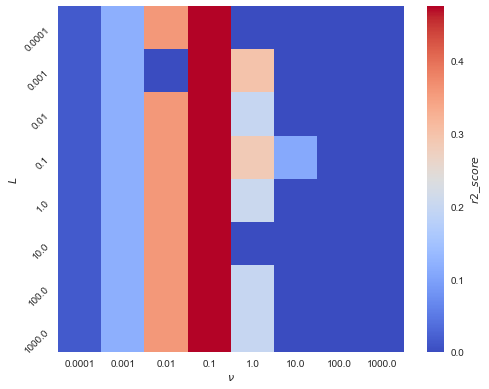

In [49]:
from matplotlib import cm

# Make plot with vertical (default) colorbar
fig, ax = plt.subplots()


print len(scores_r2)
r2Scores=[]
for i,score in enumerate(scores_r2):
    if score < 0:
        r2Scores.append(0)
    else:
        r2Scores.append(score)
    
plt.clf()
scores = np.array(r2Scores).reshape(len(length_scale), len(Nu))

# Make a nice figure
fig, ax = plt.subplots(figsize=(8, 6))

plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
cax=ax.imshow(scores, interpolation='nearest', cmap=cm.coolwarm) #spectral
cbar = fig.colorbar(cax, ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.55])
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
cbar.set_label('$r2$_$score$')
plt.xlabel(r'$\nu$')#, fontsize=20)
plt.ylabel(r'$L$')#, fontsize=20)
#plt.colorbar()
plt.yticks(np.arange(len(length_scale)), length_scale, rotation=45)
plt.xticks(np.arange(len(Nu)), Nu)
#plt.text(2000, 2000,"r2_score" , fontsize=14)
#plt.text("r2_score",rotation=90)
#plt.title("Hyper parameter tunning over Matern Kernel")
plt.grid(False)
plt.savefig("Images/HyperParamter_MaternKernel.eps")
plt.savefig("Images/HyperParamter_MaternKernel.png")
plt.show()

In [50]:
# from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.datasets import fetch_mldata
from sklearn.gaussian_process.kernels import Matern, ConstantKernel

BestMatern_Month=ConstantKernel()+Matern(length_scale=1,nu=15)+WhiteKernel(noise_level=0.001)
gp_matern_Month=GaussianProcessRegressor(kernel=BestMatern_Month,optimizer='fmin_l_bfgs_b', n_restarts_optimizer=10, normalize_y=True)
gp_matern_Month.fit(Xp_train, Y_train)
mY_pred=gp_matern_Month.predict(Xp_test)
print("GPML kernel: %s" % gp_matern_Month.kernel_)
print("Log-marginal-likelihood: %.3f"
          % gp_matern_Month.log_marginal_likelihood(gp_matern_Month.kernel_.theta))
print("r2_score: %.3f"
        % gp_matern_Month.score(Xp_test,Y_test))
#print("NSE_score: %.3f"
#        % METRICS["NSE"](Y_test,mY_pred))
print("MSE_score: %.3f"
        % METRICS["MSE"](Y_test,mY_pred))
print("WB_score: %.3f"
        % WB(Y_test,mY_pred))
print("r2_score: %.3f"
        % gp_matern_Month.score(Xp_testExt,Y_testExt))

GPML kernel: 0.00316**2 + Matern(length_scale=5.62, nu=15) + WhiteKernel(noise_level=0.00609)
Log-marginal-likelihood: 519.300
r2_score: 0.514
MSE_score: 0.007
WB_score: 0.983
r2_score: 0.210


0.00316**2 + Matern(length_scale=5.62, nu=15) + WhiteKernel(noise_level=0.00609)
<module 'matplotlib.pyplot' from '/Users/mezzatab/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>


<Figure size 640x480 with 0 Axes>

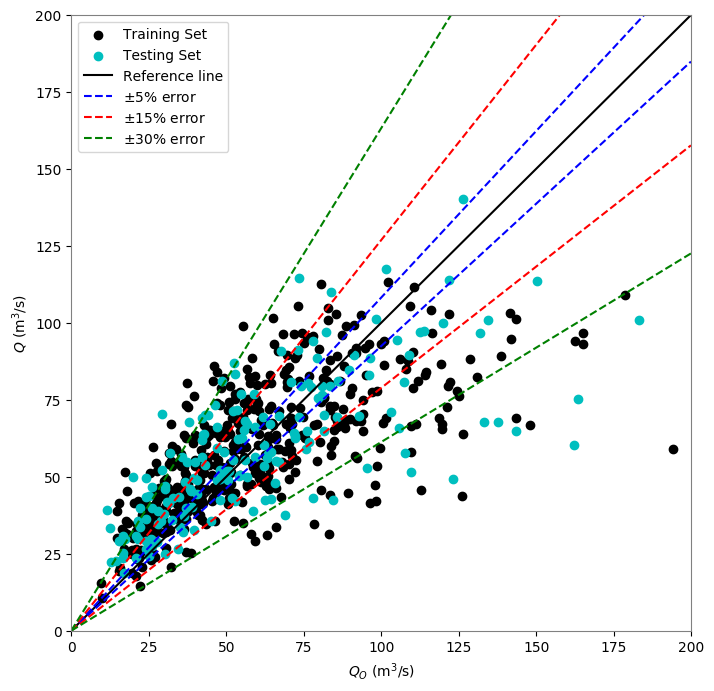

<Figure size 640x480 with 0 Axes>

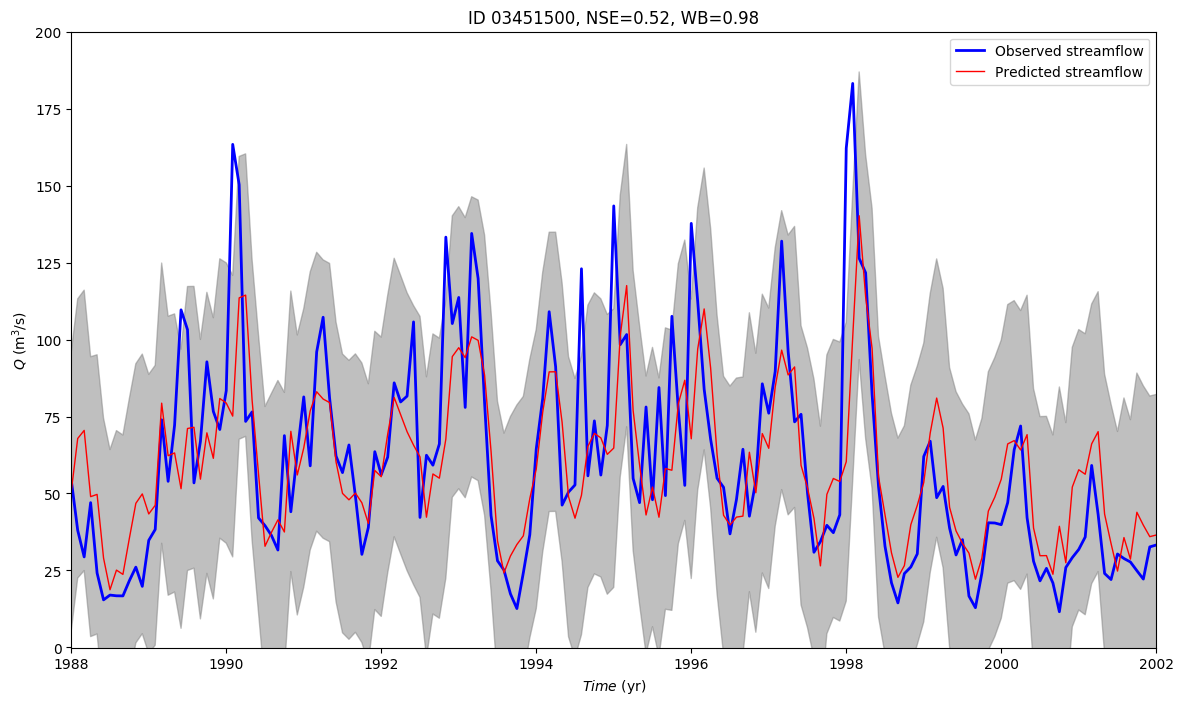

In [51]:
from matplotlib import pyplot as plt
import math
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

gp=gp_matern_Month
print gp.kernel_

Yp_pred_,Yp_std_=gp.predict(dxp,return_std=True)

Yp_pred=inverse_transform(Yp_pred_,maxQ,minQ)
Yp_std=inverse_sigTrans(Yp_std_,maxQ,minQ)


Qpp=[]
Qpp.append(MonthFrame_WithNew.loc[0,"Q"])
Qpp.append(MonthFrame_WithNew.loc[1,"Q"])
Qp=Qpp+Yp_pred

#Qpp=[]
Qp_std=Yp_std[:2]+Yp_std
MonthFrame_WithNew['Qp']=Qp
MonthFrame_WithNew['Qp_std']=Qp_std

#plt.clf()

#######
##############
#####################
############################
plt.clf()
q0 = np.arange(0.0, 200.0, 0.1)
q = q0
## Error Angles ## 
coefs=[math.tan(math.radians(45*(0.95))),math.tan(math.radians(45*(1.05))),math.tan(math.radians(0.85*45)),math.tan(math.radians(1.15*45)),math.tan(math.radians(0.7*45)),math.tan(math.radians(1.3*45))]

q10=coefs[0]*q0
q11=coefs[1]*q0
q20=coefs[2]*q0
q21=coefs[3]*q0
q30=coefs[4]*q0
q31=coefs[5]*q0



fig, ax = plt.subplots(figsize=(8,8),frameon=True)
print plt
#ax.clear()
ax.set_facecolor((1, 1, 1))
a1=plt.scatter(MonthFrame_WithNew.loc[:480,"Q"],MonthFrame_WithNew.loc[:480,"Qp"],label="Training Set",c='k')#, label="Monthly average of Daily prediction")
a2=plt.scatter(MonthFrame_WithNew.loc[480:656,"Q"],MonthFrame_WithNew.loc[480:656,"Qp"],label="Training Set",c='c')#, label="Monthly average of Daily prediction")
#ax.set_frame_on(True)
#ax.set_frame()
#ax.set_linewidth(2) 
ax.legend()
#plt.title("Monthly average of Daily prediction")

a3,=plt.plot(q0,q,label="Reference line",c='k')
a4,=plt.plot(q0,q10,label="$\pm 5%$ error",ls='--',c='b')
plt.plot(q0,q11,ls='--',c='b')
a5,=plt.plot(q0,q20,label="$\pm 15%$ error",ls='--',c='r')
plt.plot(q0,q21,ls='--',c='r')
a6,=plt.plot(q0,q30,label="$\pm 30%$ error",ls='--',c='g')
plt.plot(q0,q31,ls='--',c='g')

plt.xlabel("$Q_{O}$ (m$^3$/s)")
plt.ylabel("$Q$ (m$^3$/s)")
plt.xlim(0,200)
plt.ylim(0,200)
#plt.grid(False)


ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5') 
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
plt.rc('lines', lw=1, color='b')
legends=["Training Set","Testing Set","Reference line","$\pm 5\%$ error","$\pm 15\%$ error","$\pm 30\%$ error"]
plt.legend([a1,a2,a3,a4,a5,a6],legends)
plt.savefig("Images/Monthly_Q0_Q.eps")
plt.savefig("Images/Monthly_Q0_Q.png")
plt.show()
plt.clf()
############################
#####################
##############
#######

fig, ax2 = plt.subplots(figsize=(14,8),frameon=True)
ax2.set_facecolor((1, 1, 1))
ax2.spines['bottom'].set_color('k')
ax2.spines['top'].set_color('k') 
ax2.spines['right'].set_color('k')
ax2.spines['left'].set_color('k')
#plt.show()

#ax.spines(color='black')
#, label="Monthly average of Daily prediction")
ax2.plot(MonthFrame_WithNew.loc[:,"Time"], MonthFrame_WithNew.loc[:,"Q"],'b',linewidth=2,label='Observed streamflow')
ax2.plot(MonthFrame_WithNew.loc[:,"Time"], MonthFrame_WithNew.loc[:,"Qp"],'r',linewidth=1,label='Predicted streamflow')
ax2.legend()
#c=mt_Frame[["Time"]]
plt.fill_between(MonthFrame_WithNew.loc[:,"Time"],MonthFrame_WithNew.loc[:,"Qp"]-2*MonthFrame_WithNew.loc[:,"Qp_std"], MonthFrame_WithNew.loc[:,"Qp"]+2*MonthFrame_WithNew.loc[:,"Qp_std"], alpha=0.5, color = '0.5')
plt.xlabel("$Time$ (yr)")
plt.ylabel("$Q$ (m$^3$/s)")
plt.ylim(-0.1,200)
plt.xlim(1988,2002)
plt.title("ID 03451500, NSE=0.52, WB=0.98")
x=[i for i in range(1988,2004,2)]
plt.xticks(x)
plt.grid(False)
plt.savefig("Images/Monthly_timeseries_Q0_Q_Test.eps")
plt.savefig("Images/Monthly_timeseries_Q0_Q_Test.png")


#
#plt.xlabel("Q")
#plt.ylabel(r"$Q_{pred}$")
#plt.title(r"")
#plt.tight_layout()
plt.show()
plt.clf()


<Figure size 640x480 with 0 Axes>

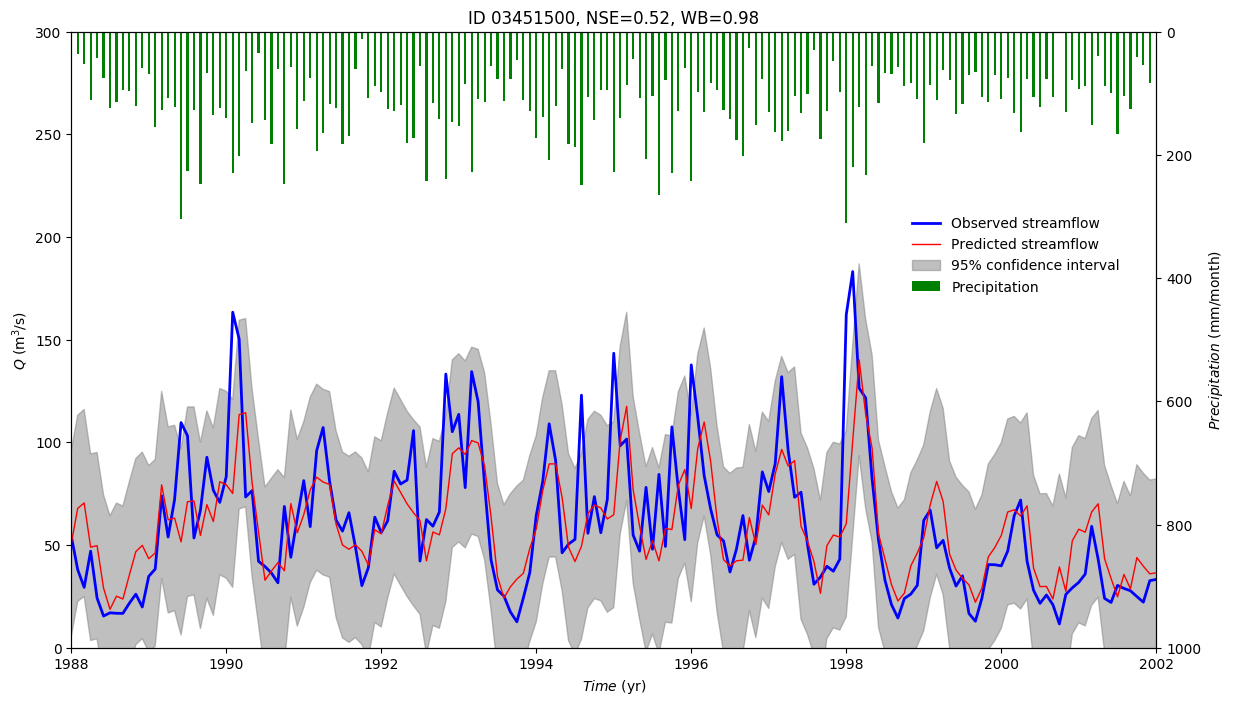

In [87]:
plt.clf()
def two_scales(ax1, time, data1, data2, c1, c2):
    """

    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    time : array-like
        x-axis values for both datasets

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twinx()

#    ax1.plot(time, data1, color=c1)

    ax1.plot(MonthFrame_WithNew.loc[:,"Time"], MonthFrame_WithNew.loc[:,"Q"],'b',linewidth=2,label='Observed streamflow')
    ax1.plot(MonthFrame_WithNew.loc[:,"Time"], MonthFrame_WithNew.loc[:,"Qp"],'r',linewidth=1,label='Predicted streamflow')
    ax1.fill_between(MonthFrame_WithNew.loc[:,"Time"],MonthFrame_WithNew.loc[:,"Qp"]-2*MonthFrame_WithNew.loc[:,"Qp_std"], MonthFrame_WithNew.loc[:,"Qp"]+2*MonthFrame_WithNew.loc[:,"Qp_std"], alpha=0.5, color = '0.5',label='95% confidence interval')
    
    ax1.set_xlabel("$Time$ (yr)")
    ax1.set_ylabel("$Q$ (m$^3$/s)")

    ax2.bar(time, data2,width=0.028,color=c2, label="Precipitation")
    ax2.set_ylabel('$Precipitation$ (mm/month)')
    return ax1, ax2


# Create some mock data
t = MonthFrame_WithNew.loc[:,"Time"]
s1 = MonthFrame_WithNew.loc[:,"Q"]
s2 = MonthFrame_WithNew.loc[:,"P"]

# Create axes
fig, ax = plt.subplots(figsize=(14,8),frameon=True)
ax1, ax2 = two_scales(ax, t, s1, s2, 'r', 'g')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
#color_y_axis(ax1, 'r')
#color_y_axis(ax2, 'b')
#ax2.plot(t,s2)
ax1.set_xlim(1988,2002)
ax1.set_ylim(0,300)
ax2.set_ylim(1000,0)

#legends=["Training Set","Testing Set","Reference line","$\pm 5\%$ error","$\pm 15\%$ error","$\pm 30\%$ error"]
ax1.legend(loc=[0.77,0.6],frameon=False)
ax2.legend(loc=[0.77,0.565],frameon=False)
plt.title("ID 03451500, NSE=0.52, WB=0.98")
plt.savefig("Images/Monthly_timeseries_Q_P_Test.eps")
plt.savefig("Images/Monthly_timeseries_Q_P_Test.png")
plt.show()

In [364]:
MonthFrame_WithNew[["Qp","Q","Qp_std", "P"]]

,Qp,Q,Qp_std,P
0,42.247742,42.247742,22.836895,3.229032
1,91.716786,91.716786,23.050454,4.669643
2,89.490844,90.473667,22.836895,5.910000
3,55.709100,71.221379,23.050454,1.283793
4,53.142752,39.877000,22.671326,3.946000
5,45.764643,32.069310,22.600935,4.168621
6,45.038894,46.723000,22.777810,6.345000
7,46.406502,62.958667,22.647528,5.052000
8,49.580500,47.806207,22.595151,4.558276
9,36.704006,27.212000,23.005265,1.074333


In [33]:
## With extended inputs ## avP, avT ..... 
Nu = list(10. ** np.arange(-4, 4)) #(-3,2)

length_scale = list(10. ** np.arange(-4, 4)) #(-2,4)

kernels = [Matern(length_scale=scale,nu=nu) for scale in length_scale for nu in Nu]  # long term smooth rising trend

gps = [GaussianProcessRegressor(kernel=k, alpha=0,optimizer=None, normalize_y=True) for k in kernels]
pred=[]
scores_r2=[]
WB_score=[]
MSE_score=[]
for i, gp in enumerate(gps):
    try:
        gp.fit(X_train, Y_train)
        pred.append(gp.predict(X_test))        
        scores_r2.append(gp.score(X_test,Y_test))
        WB_score.append(WB(pred[-1],Y_test))
        MSE_score.append(METRICS["MSE"](pred[-1],Y_test))
        print("GPML kernel: %s" % gp.kernel_)
        print("Log-marginal-likelihood: %.3f"
          % gp.log_marginal_likelihood(gp.kernel_.theta))
        print("r2_score: %.3f"
          % scores_r2[-1])
        print("WB: %.3f"
          % WB_score[-1])       
        print("MSE: %.3f"
          % MSE_score[-1])       
        
    except:
        scores_r2.append(0)
        WB_score.append(0)
        pass
    

GPML kernel: Matern(length_scale=0.0001, nu=0.0001)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=0.0001, nu=0.001)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=0.0001, nu=0.01)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=0.0001, nu=0.1)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=0.0001, nu=1)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=0.0001, nu=10)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=0.001, nu=0.0001)
Log-marginal-likelihood: -441.980
r2_score: -0.001
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=0.001, nu=0.001)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length

64


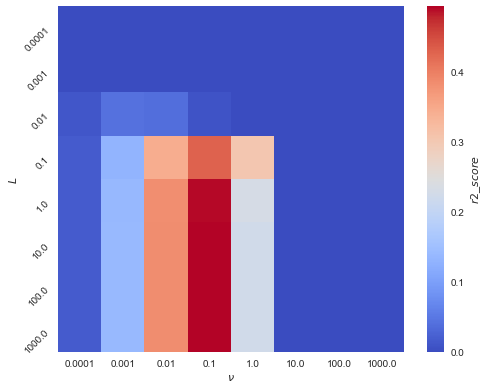

In [34]:
from matplotlib import cm

# Make plot with vertical (default) colorbar
fig, ax = plt.subplots()


print len(scores_r2)
r2Scores=[]
for i,score in enumerate(scores_r2):
    if score < 0:
        r2Scores.append(0)
    else:
        r2Scores.append(score)
    
plt.clf()
scores = np.array(r2Scores).reshape(len(length_scale), len(Nu))

# Make a nice figure
fig, ax = plt.subplots(figsize=(8, 6))

plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
cax=ax.imshow(scores, interpolation='nearest', cmap=cm.coolwarm) #spectral
cbar = fig.colorbar(cax, ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.55])
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
cbar.set_label('$r2$_$score$')
plt.xlabel(r'$\nu$')#, fontsize=20)
plt.ylabel(r'$L$')#, fontsize=20)
#plt.colorbar()
plt.yticks(np.arange(len(length_scale)), length_scale, rotation=45)
plt.xticks(np.arange(len(Nu)), Nu)
#plt.text(2000, 2000,"r2_score" , fontsize=14)
#plt.text("r2_score",rotation=90)
#plt.title("Hyper parameter tunning over Matern Kernel")
plt.grid(False)
plt.savefig("Images/HyperParamter_MaternKernel.eps")
plt.savefig("Images/HyperParamter_MaternKernel.png")
plt.show()

In [35]:
## With extended inputs ## avP, avT ..... 
Nu = list(10. ** np.arange(-2, 2)) #(-3,2)

length_scale = list(10. ** np.arange(-3, 3)) #(-2,4)

kernels = [Matern(length_scale=scale,nu=nu) for scale in length_scale for nu in Nu]  # long term smooth rising trend

gps = [GaussianProcessRegressor(kernel=k, alpha=0,optimizer=None, normalize_y=True) for k in kernels]
pred=[]
scores_r2=[]
WB_score=[]
MSE_score=[]
for i, gp in enumerate(gps):
    try:
        gp.fit(Xs_train, Y_train)
        pred.append(gp.predict(Xs_test))        
        scores_r2.append(gp.score(Xs_test,Y_test))
        WB_score.append(WB(pred[-1],Y_test))
        MSE_score.append(METRICS["MSE"](pred[-1],Y_test))
        print("GPML kernel: %s" % gp.kernel_)
        print("Log-marginal-likelihood: %.3f"
          % gp.log_marginal_likelihood(gp.kernel_.theta))
        print("r2_score: %.3f"
          % scores_r2[-1])
        print("WB: %.3f"
          % WB_score[-1])       
        print("MSE: %.3f"
          % MSE_score[-1])       
        
    except:
        scores_r2.append(0)
        WB_score.append(0)
        pass
    

GPML kernel: Matern(length_scale=0.001, nu=0.01)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=0.001, nu=0.1)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=0.001, nu=1)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=0.001, nu=10)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=0.01, nu=0.01)
Log-marginal-likelihood: -441.948
r2_score: 0.018
WB: 0.968
MSE: 0.014
GPML kernel: Matern(length_scale=0.01, nu=0.1)
Log-marginal-likelihood: -441.975
r2_score: 0.001
WB: 0.970
MSE: 0.014
GPML kernel: Matern(length_scale=0.01, nu=1)
Log-marginal-likelihood: -441.979
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=0.01, nu=10)
Log-marginal-likelihood: -441.980
r2_score: -0.002
WB: 0.971
MSE: 0.014
GPML kernel: Matern(length_scale=0.1, nu=0.01)
Log

24


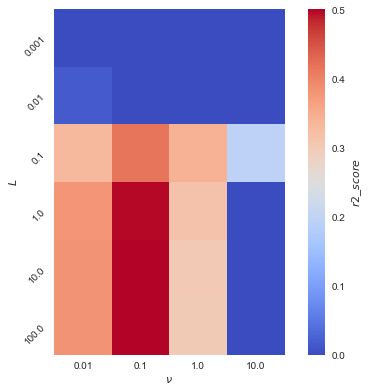

In [36]:
from matplotlib import cm

# Make plot with vertical (default) colorbar
fig, ax = plt.subplots()


print len(scores_r2)
r2Scores=[]
for i,score in enumerate(scores_r2):
    if score < 0:
        r2Scores.append(0)
    else:
        r2Scores.append(score)
    
plt.clf()
scores = np.array(r2Scores).reshape(len(length_scale), len(Nu))

# Make a nice figure
fig, ax = plt.subplots(figsize=(8, 6))

plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
cax=ax.imshow(scores, interpolation='nearest', cmap=cm.coolwarm) #spectral
cbar = fig.colorbar(cax, ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.55])
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
cbar.set_label('$r2$_$score$')
plt.xlabel(r'$\nu$')#, fontsize=20)
plt.ylabel(r'$L$')#, fontsize=20)
#plt.colorbar()
plt.yticks(np.arange(len(length_scale)), length_scale, rotation=45)
plt.xticks(np.arange(len(Nu)), Nu)
#plt.text(2000, 2000,"r2_score" , fontsize=14)
#plt.text("r2_score",rotation=90)
#plt.title("Hyper parameter tunning over Matern Kernel")
plt.grid(False)
plt.savefig("Images/HyperParamter_MaternKernel.eps")
plt.savefig("Images/HyperParamter_MaternKernel.png")
plt.show()

In [73]:
print(plt.style.available)

['seaborn-darkgrid', 'Solarize_Light2', 'seaborn-notebook', 'classic', 'seaborn-ticks', 'grayscale', 'bmh', 'seaborn-talk', 'dark_background', 'ggplot', 'fivethirtyeight', '_classic_test', 'seaborn-colorblind', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn-bright', 'seaborn-poster', 'seaborn-muted', 'seaborn-paper', 'seaborn-white', 'fast', 'seaborn-pastel', 'seaborn-dark', 'tableau-colorblind10', 'seaborn', 'seaborn-dark-palette']


In [1]:
import math
print math.radians(30)

0.523598775598
